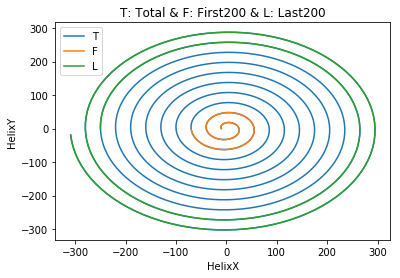

<Figure size 1296x4320 with 0 Axes>

In [2]:
#
# first lest see what is the helix!!!! and its first and last 200 indexes ...
# in the code below we'll show first 200 and last 200 elements of this helix and also its Complete shape.
#
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(1000) 
u = 0.3 
r0 = 10
r = r0 + u * t
omega = 2 * np.pi * 0.01 
phi0 = np.pi 
phi = -omega * t + phi0
x = r * np.cos(phi)
y = r * np.sin(phi)

# total Helix ...

plt.plot(x,y)

# first 200 elements ...
x_first200 = x[:200]
y_first200 = y[:200]
plt.plot(x_first200, y_first200) 

# last 200 elements ...
x_last200 = x[800:]
y_last200 = y[800:]
plt.plot(x_last200,y_last200)
plt.legend('TFL')
plt.title("T: Total & F: First200 & L: Last200")
plt.ylabel("HelixY")
plt.xlabel("HelixX")
plt.show() 
plt.gcf().set_size_inches(18, 60)



In [3]:
"""

FourthQuestion 
Recursive Neural Networks two dimension for Helix ...
defining useful utilities ...

"""

import numpy as np
import torch as myTorch
import torch.nn as nn
from torch.autograd import Variable as Gradianer
import matplotlib.pyplot as plt


# define Utilities ...
def makeNoise(withoutNoiseSignal,Noise_mean,Noise_Var):
    GaussNoise = np.random.normal(Noise_mean,Noise_Var,size = withoutNoiseSignal.shape)
    return withoutNoiseSignal + GaussNoise

# define Custom Helix with the given sampleCode 
def helix(helix_size, mean , var):
    
    t = np.arange(helix_size)
    u = 0.001
    r0 = 0
    r = r0 + u * t
    
    omega = 2 * np.pi * 0.005
    phi0 = np.pi 
    phi = -omega * t + phi0
    
    x = r * np.cos(phi) 
    y = r * np.sin(phi)
    
    # create Noisy Helix!!!
    
    xNoise = makeNoise(x, mean, var)
    yNoise = makeNoise(y, mean, var)
    
    return xNoise, yNoise, x, y


class DenoiseRNN(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(DenoiseRNN, self).__init__()
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
        self.activeFunction = nn.Tanh()  # activation function ...
        
        self.loss_log = []
        self.neuron_log = []
        self.hidden_neurons = []
        self.hidden_size = hidden_size

    def forward(self, x):
        
        # getting the NeuralFinal and Hidden answer
        pred, hidden = self.rnn(x, None)
        self.hidden_neurons = hidden
        shapedMat = self.linear(pred)
        
        pred = self.activeFunction(shapedMat)
        # re shape to x & 2 dimension ...
        pred = pred.view(pred.data.shape[0], -1, 2)
        return pred
    
    
    def train(self, inputs, targets, epoches, learning_rate):
        
        print('\n\n -- > Self tariner mode \n\n learning rate = ', learning_rate)
        print('\n batch size = ', '\n\n epoches = ', epoches)
        print('\n hidden size = ', self.hidden_size)
        
        # Loss Calculaters ...
        predictions = []
        optimizer = myTorch.optim.Adam(self.parameters(), lr=learning_rate)
        loss_func = nn.L1Loss()
        
        for t in range(epoches + 1):
            
            # reshaping the matrixes ...
            inp = Gradianer(myTorch.Tensor(inputs.reshape((inputs.shape[0], -1, 2))), requires_grad=True) # in order to calculate Loss 
            # we need to turn on Grad_requires ...
            out = Gradianer(myTorch.Tensor(targets.reshape((targets.shape[0], -1, 2))))
            pred = self(inp)
            
            optimizer.zero_grad()
            predictions.append(pred.data.numpy())
            loss = loss_func(pred, out)
            self.add2Log(float(loss), self.hidden_neurons)
            # saving Data inOrder 2  plot ...
            loss.backward()
            optimizer.step()
            
        lossDoc = []
        neuronDoc = []
        lossDoc,neuronDoc = self.getlogData()
        
        #lossDoc = lossDoc.data.numpy()
        #neuronDoc = neuronDoc.data.numpy()
        
        # print("\n\n\n\n\n LossDoc:it is too much ")
        # print(lossDoc)
        
        # print("\n\n\n\n\n NeuronDoc:it is too much  ")
        # print(neuronDoc)
            
        return
            
    def add2Log(self, loss, neuron):
        self.loss_log.append(loss)
        self.neuron_log.append(neuron.data.numpy())
        return
    
    def getlogData(self):
        return self.loss_log, self.neuron_log
    



 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  300

 hidden size =  20


TrainedSuccessfuly ...


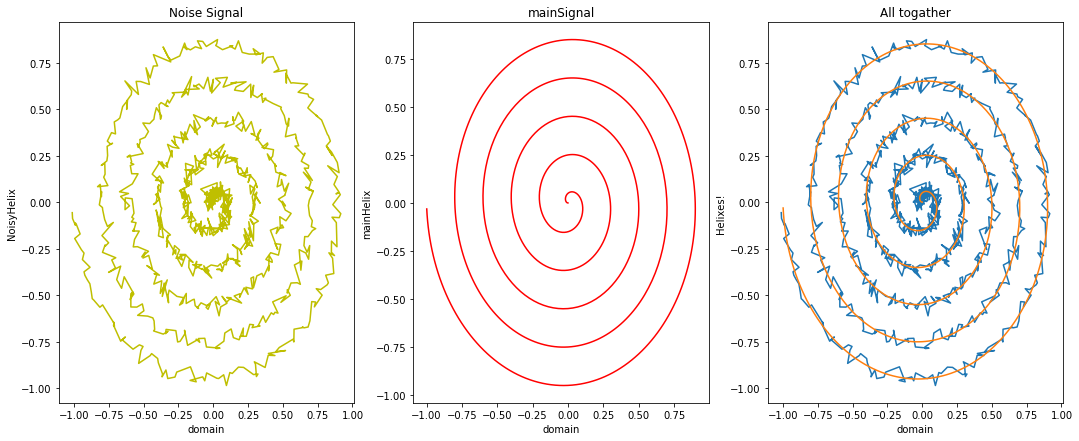

In [4]:
"""
Training Recursive Neural Network ...
"""

import numpy as np
import matplotlib.pyplot as plt

input_size = 2
hidden_size = 20
output_size = 2

# consider NoiseMean as 0 ...
xNoise, yNoise, xReal, yReal = helix(1000 ,0, 0.025 )

plt.subplot(1,3,1)
plt.plot(xNoise,yNoise,'y')
plt.title("Noise Signal")
plt.ylabel("NoisyHelix")
plt.xlabel("domain")

plt.subplot(1,3,2)
plt.plot(xReal,yReal,'r')
plt.title("mainSignal")
plt.ylabel("mainHelix")
plt.xlabel("domain")

plt.subplot(1,3,3)
plt.plot(xNoise,yNoise,xReal,yReal)
plt.title("All togather")
plt.ylabel("Helixes!")
plt.xlabel("domain")

plt.gcf().set_size_inches(18, 7)


# zipping data To train ...
noisyData = np.concatenate([[xNoise], [yNoise]], 0)
realData = np.concatenate([[xReal], [yReal]], 0)

# lets Train
Denoiser2D = DenoiseRNN(input_size, hidden_size, output_size)
Denoiser2D.train(noisyData, realData, 300, 0.02)

print("\n\nTrainedSuccessfuly ...")


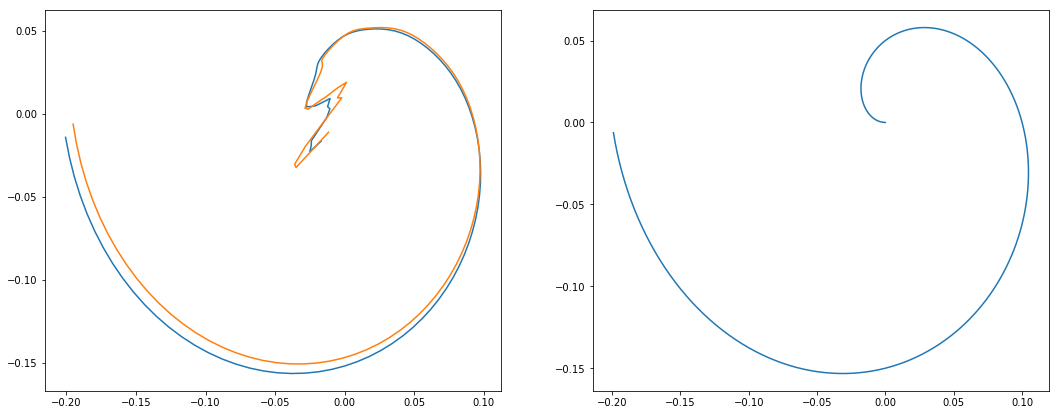

In [6]:

"""

    ّFirst 200 points for test and plotting
    
"""

import torch as myTorch

xNoise, yNoise, xMain, yMain = helix(1000,0,0)

#    extracting first 200 element 
#    deNoising the extracted Data

in_data = np.concatenate([[xNoise[:200]], [yNoise[:200]]], 0)

filteredData = Denoiser2D(myTorch.Tensor(in_data.reshape((in_data.shape[0], -1, 2))))

filteredDataX = filteredData[0]
filteredDataY = filteredData[1]

plt.subplot(1, 2, 1)
plt.plot(filteredDataX.data.numpy(),filteredDataY.data.numpy())

plt.subplot(1, 2, 2)
plt.plot(in_data[0], in_data[1])

plt.gcf().set_size_inches(18, 7)
plt.show()


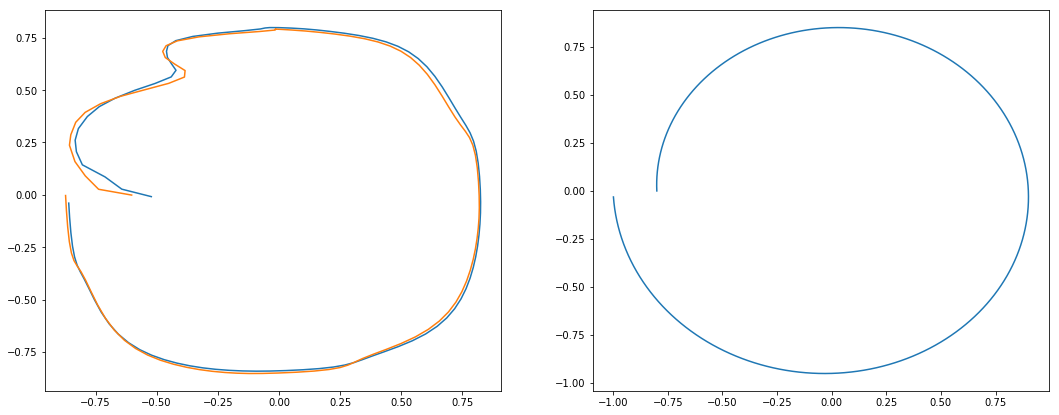

In [7]:
"""

    last 200 points for test and plotting
    
"""

import torch as myTorch

xNoise, yNoise, xMain, yMain = helix(1000,0,0)

#    extracting first 200 element 
#    deNoising the extracted Data

in_data = np.concatenate([[xNoise[800:]], [yNoise[800:]]], 0)

filteredData = Denoiser2D(myTorch.Tensor(in_data.reshape((in_data.shape[0], -1, 2))))

filteredDataX = filteredData[0]
filteredDataY = filteredData[1]

plt.subplot(1, 2, 1)
plt.plot(filteredDataX.data.numpy(),filteredDataY.data.numpy())

plt.subplot(1, 2, 2)
plt.plot(in_data[0], in_data[1])

plt.gcf().set_size_inches(18, 7)
plt.show()


In [8]:

def SNR(signal,mainSignal):
        
        #
        #
        #
        #    stackExchange Usefull Data about SNR and how to calculate it on Discrete Data ... 
        #
        #
        #
        
        noise = signal - mainSignal
        sigma2Signal = np.sum(signal*signal )
        sigma2Noise  = np.sum(noise*noise)
        if (sigma2Noise == 0):
            return 'infinity'
        return sigma2Signal/sigma2Noise

    

in_data = np.concatenate([[xNoise[0:]], [yNoise[0:]]], 0)
# total Data
filteredData = Denoiser2D(myTorch.Tensor(in_data.reshape((in_data.shape[0], -1, 2))))
srn = SNR(in_data[0,500:],filteredData[0,:,0].data.numpy())
print("SRN is: ",srn)



SRN is:  0.6661283396037633


In [34]:
"""

    # Question number 4
    # 4.5.1
    learning rate effect
    
"""

import numpy as np
import matplotlib.pyplot as plt

input_size = 2
hidden_size = 20
output_size = 2

xNoise, yNoise, xMain, yMain = helix(1000,0,0.025)

noise_Data = np.concatenate([[xNoise], [yNoise]], 0)
main_Data = np.concatenate([[xMain], [yMain]], 0)

learning_rate = [0.001, 0.005, 0.010, 0.020, 0.040, 0.080, 0.160, 0.32, 0.50 , 1.0, 1.5, 2]
epoches = 300

D1 = []
for i in range(12):
    D1.append(DenoiseRNN(input_size, hidden_size, output_size))
    D1[i].train(noise_Data,main_Data, epoches, learning_rate[i])
    



 -- > Self tariner mode 

 learning rate =  0.001

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.005

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.01

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.04

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.08

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.16

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.32

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.5

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  1.0

 ba

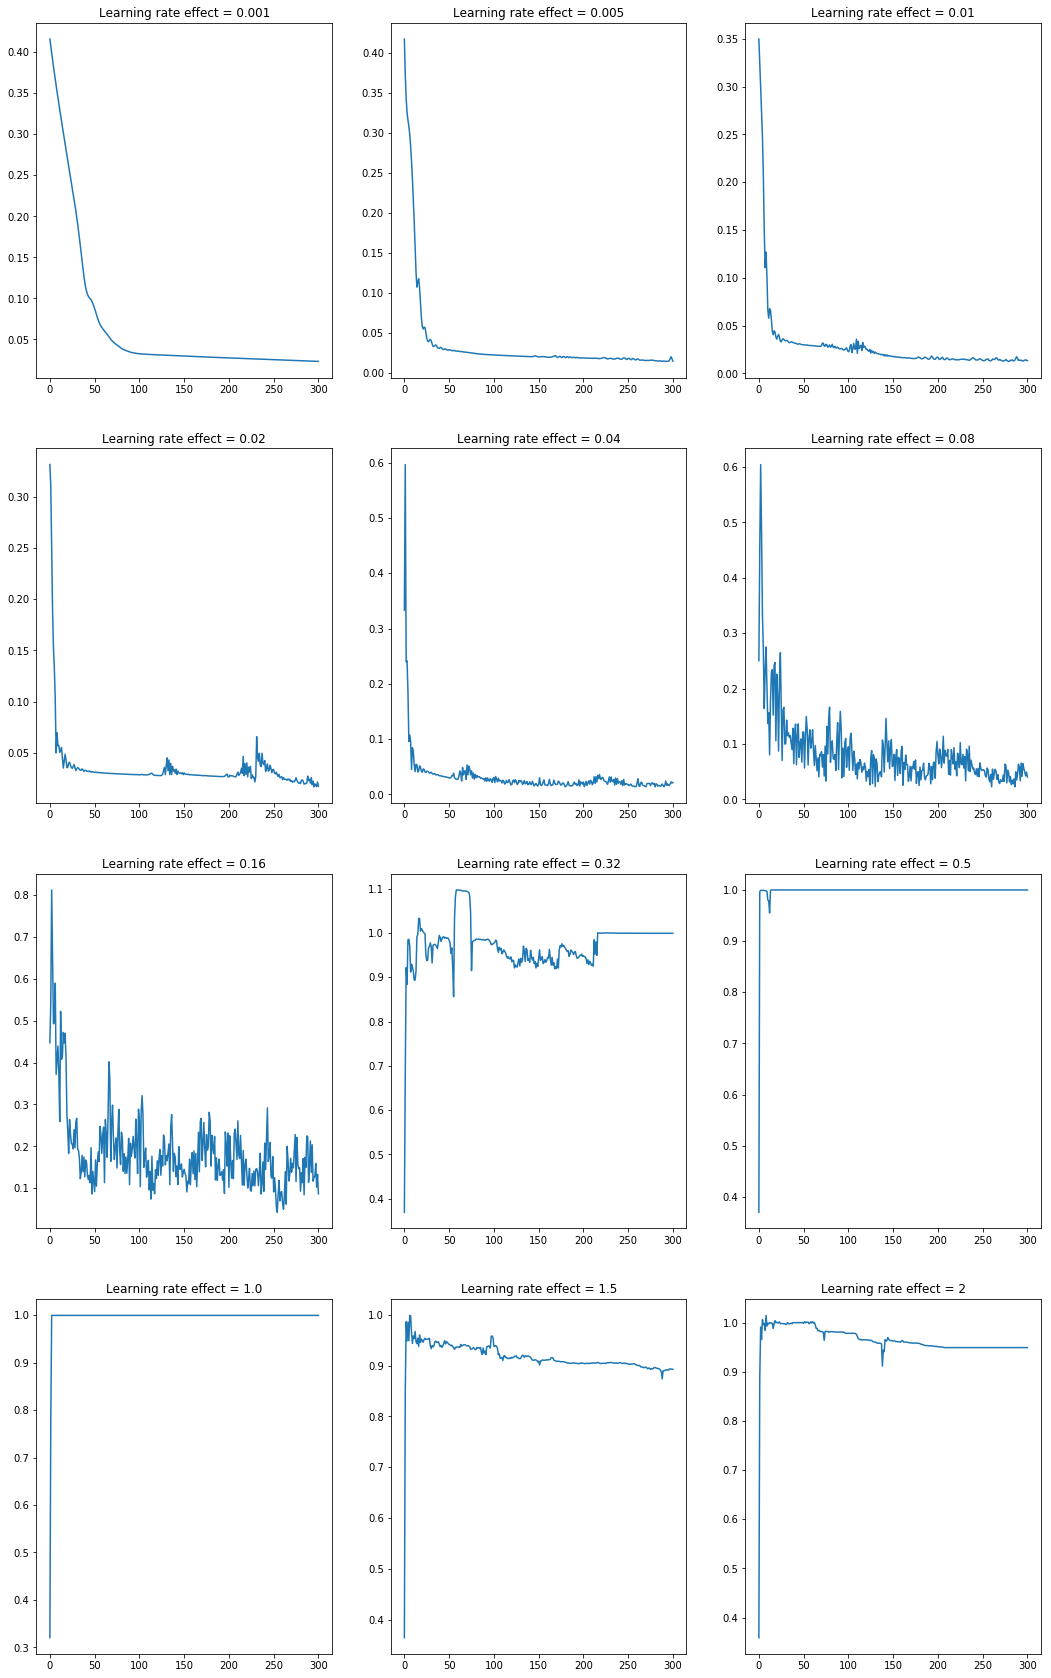

In [35]:
for i in range(12):
    
    lossLog, NeuronLog = D1[i].getlogData()
    
    # extracting Data
    # lossLog --> lossLog & neuron --> Neuron log ...
    
    plt.subplot(4, 3, i+1)
    plt.plot(lossLog)
    plt.title('Learning rate effect = {}'.format(learning_rate[i]))
    
plt.gcf().set_size_inches(18, 30)
plt.show()
    

In [9]:
"""
    # Question number 4
    # 4.5.2
    # batch size effect
    
"""
import numpy as np
import matplotlib.pyplot as plt

input_size = 2
hidden_size = 20
output_size = 2

xNoise, yNoise, xReal, yReal = helix(1000,0, 0.025)

batch_size = []
noise_Data = []
main_Data = []

for i in range(12):
    
    noise_Data.append(np.concatenate([[xNoise[:(i + 1)*100]], [yNoise[:(i + 1)*100]]], 0))
    main_Data.append(np.concatenate([[xReal[:(i + 1)*100]], [yReal[:(i + 1)*100]]], 0))
    batch_size.append((i + 1)*100)
    
learning_rate = 0.02
epochs = 300

D2 = []
for i in range(12):
    D2.append(DenoiseRNN(input_size, hidden_size, output_size))
    D2[i].train(noise_Data[i], main_Data[i], epochs, learning_rate)




 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  300

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 ba

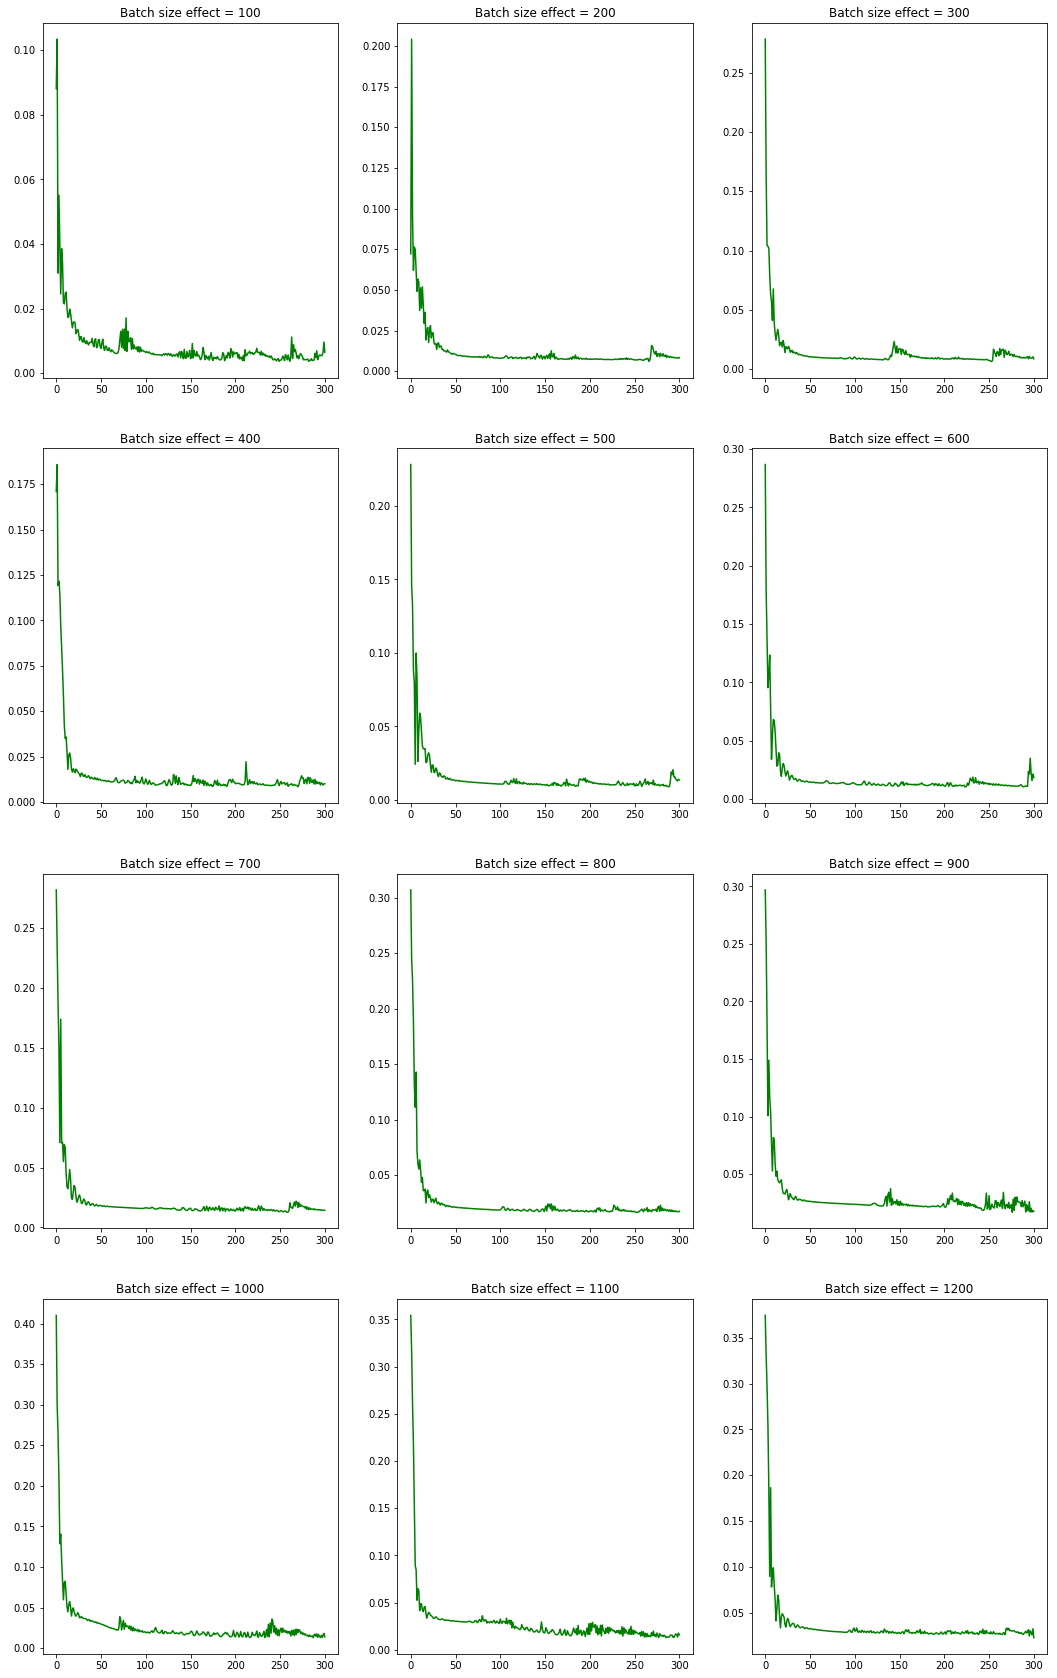

In [31]:

from matplotlib import pyplot as plt


for i in range(12):
    
    lossLog, NeuronLog = D2[i].getlogData()
    plt.subplot(4, 3, i+1)
    plt.plot(lossLog,'-g')
    plt.title('Batch size effect = {}'.format(batch_size[i]))

plt.gcf().set_size_inches(18, 30)
plt.show()


In [30]:
"""
    # Question number 4
    # 4.5.3
    # number of epoches
    
"""
import numpy as np
import matplotlib.pyplot as plt

input_size = 2
hidden_size = 20
output_size = 2
xNoise, yNoise, xReal, yReal = helix(1000,0,0.025)

inp_data = np.concatenate([[xNoise], [yNoise]], 0)
tar_data = np.concatenate([[xReal], [yReal]], 0)
learning_rate = 0.02
epochs = [10, 20, 40, 80, 160, 320, 640, 1000,2000] 
D3 = []
for i in range(9):
    D3.append(DenoiseRNN(input_size, hidden_size, output_size))
    # by putting different epoch size in the third index of .train method ...
    D3[i].train(inp_data, tar_data, epochs[i], learning_rate)





 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  10

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  20

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  40

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  80

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  160

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  320

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  640

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  1000

 hidden size =  20


 -- > Self tariner mode 

 learning rate =  0.02

 batch size =  

 epoches =  2000

 hidden size =  20


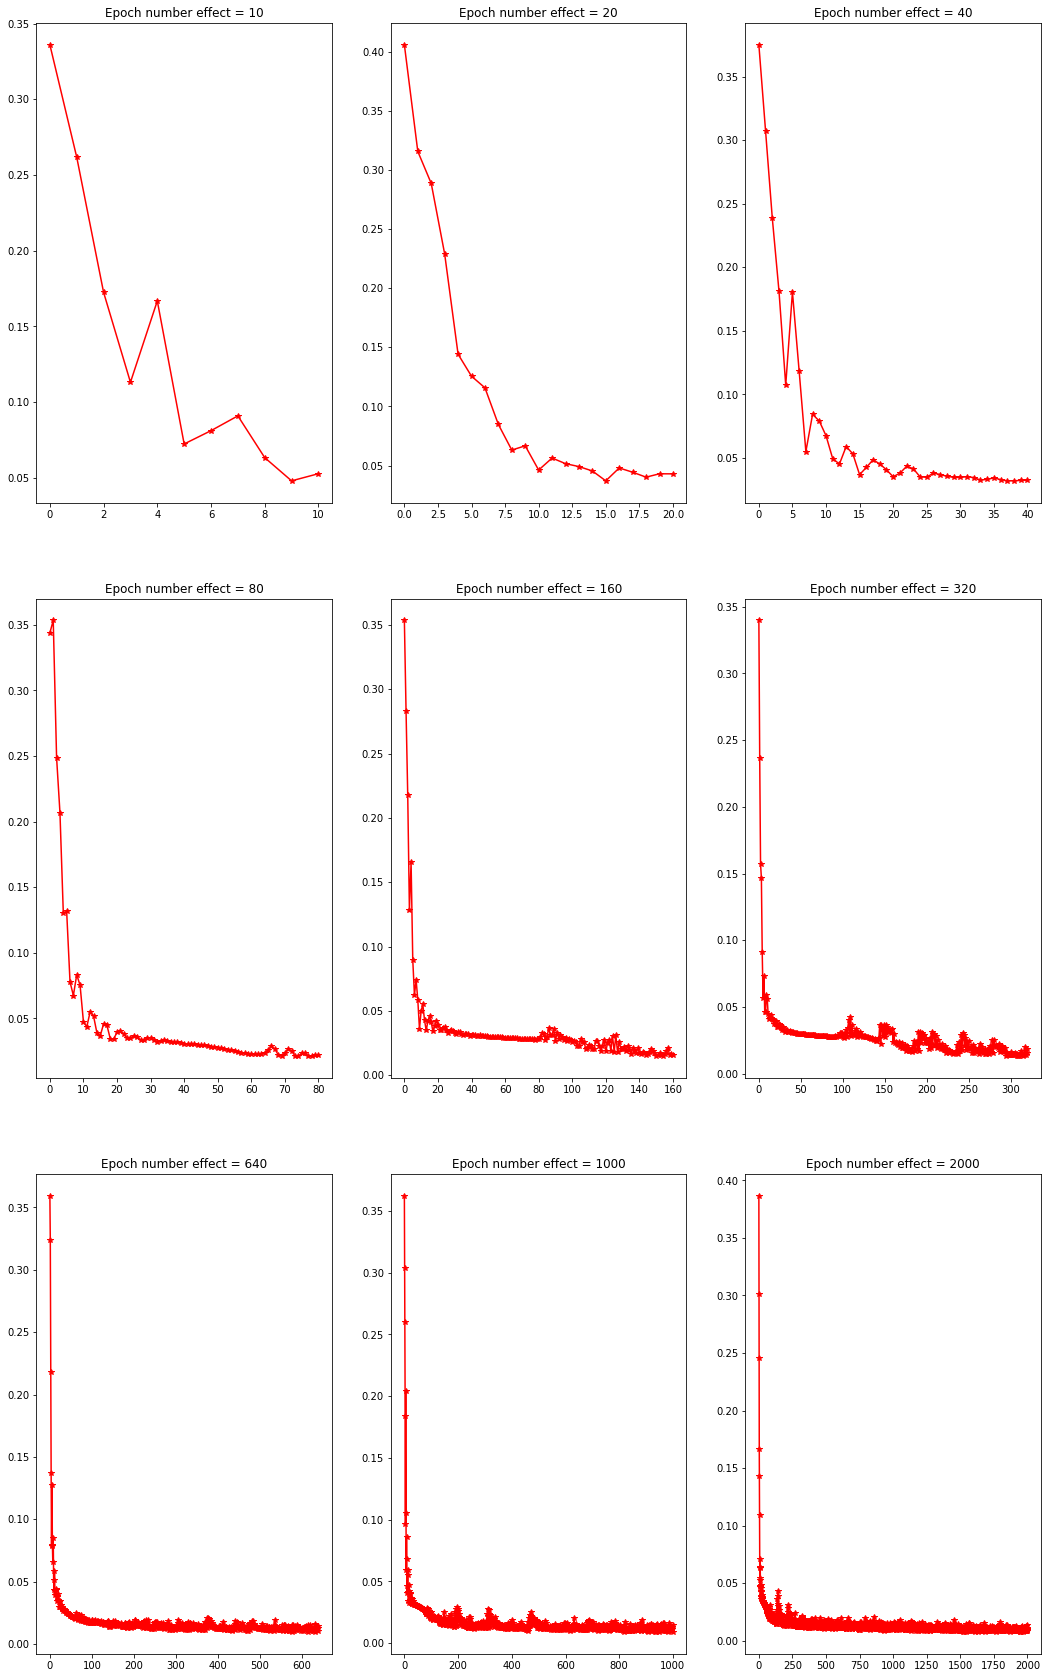

In [38]:
from matplotlib import pyplot as plt

for i in range(9):
    
    lossLog, NeuronLog = D3[i].getlogData()
    plt.subplot(3, 3, i+1)
    plt.plot(lossLog,'*-r')
    plt.title('Epoch number effect = {}'.format(epochs[i]))
    
plt.gcf().set_size_inches(18, 30)
plt.show()


In [40]:
"""
    # Question number 4
    # 4.5.4
    # number of hidden layers ...
    
"""
import numpy as np
import matplotlib.pyplot as plt

input_size = 2
hidden_size = [1, 2, 4, 8, 16, 32, 64, 100, 200,300,400,500]
# i started exponenioally in order to see the effect of hidden layers more sharply
output_size = 2
xNoise, yNoise, xReal, yReal = helix(1000,0,0.025)

noise_Data = np.concatenate([[xNoise], [yNoise]], 0)
main_Data = np.concatenate([[xMain], [yMain]], 0)

learning_rate = 0.2
epoches = 300

D4 = []
for i in range(12):
    D4.append(DenoiseRNN(input_size, hidden_size[i], output_size))
    D4[i].train(noise_Data, main_Data, epoches, learning_rate)
    




 -- > Self tariner mode 

 learning rate =  0.2

 batch size =  

 epoches =  300

 hidden size =  1


 -- > Self tariner mode 

 learning rate =  0.2

 batch size =  

 epoches =  300

 hidden size =  2


 -- > Self tariner mode 

 learning rate =  0.2

 batch size =  

 epoches =  300

 hidden size =  4


 -- > Self tariner mode 

 learning rate =  0.2

 batch size =  

 epoches =  300

 hidden size =  8


 -- > Self tariner mode 

 learning rate =  0.2

 batch size =  

 epoches =  300

 hidden size =  16


 -- > Self tariner mode 

 learning rate =  0.2

 batch size =  

 epoches =  300

 hidden size =  32


 -- > Self tariner mode 

 learning rate =  0.2

 batch size =  

 epoches =  300

 hidden size =  64


 -- > Self tariner mode 

 learning rate =  0.2

 batch size =  

 epoches =  300

 hidden size =  100


 -- > Self tariner mode 

 learning rate =  0.2

 batch size =  

 epoches =  300

 hidden size =  200


 -- > Self tariner mode 

 learning rate =  0.2

 batch size =  

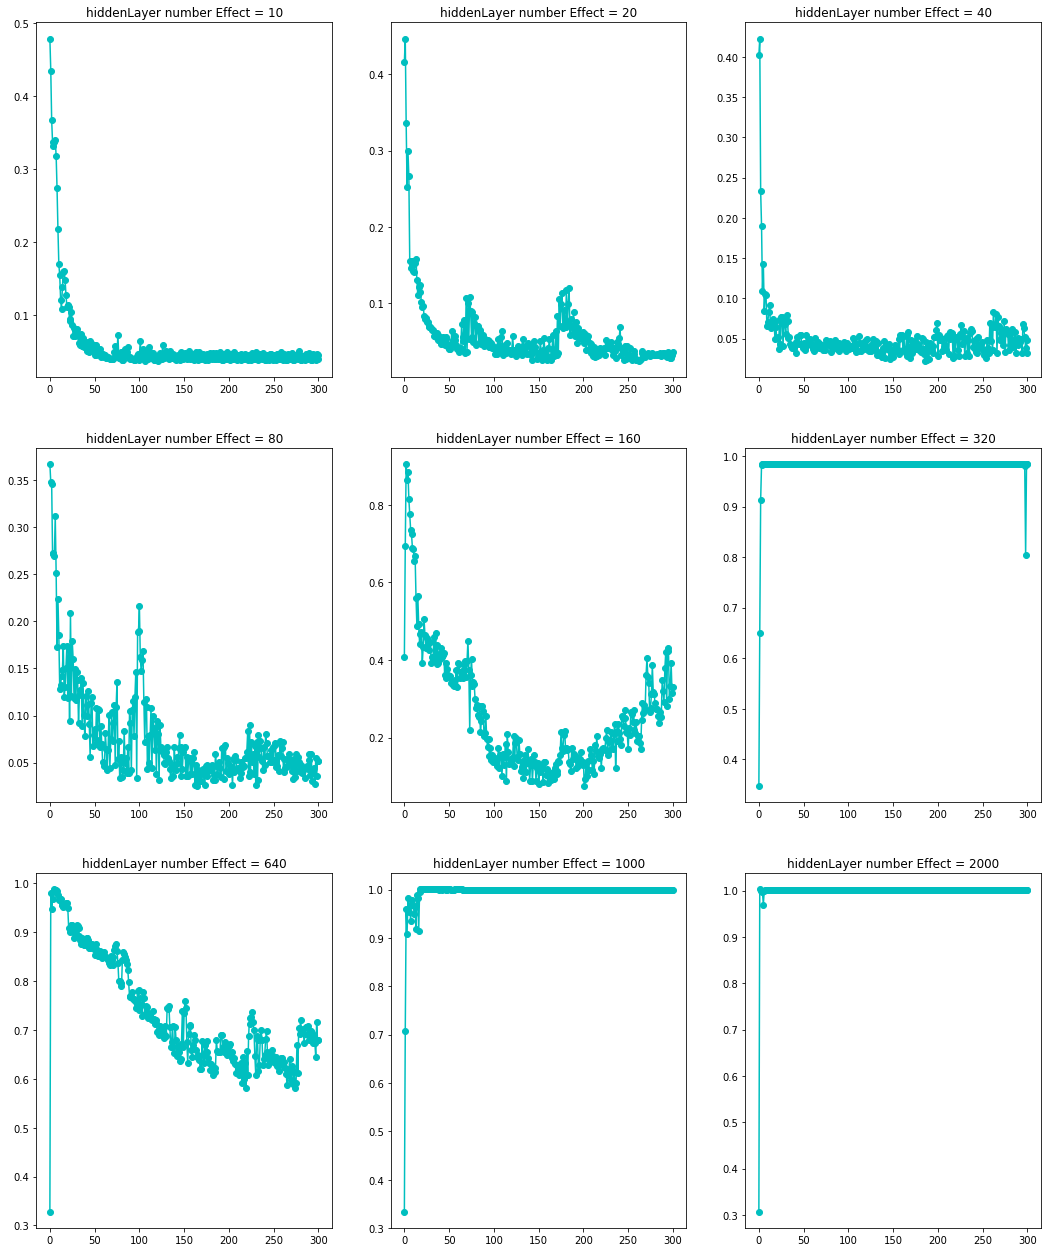

In [42]:
from matplotlib import pyplot as plt

for i in range(9):
    
    # extracting Data from Mylog ...
    lossLog, NeuronLog = D4[i].getlogData()
    plt.subplot(4, 3, i+1)
    plt.plot(lossLog,'o-c')
    plt.title('hiddenLayer number Effect = {}'.format(epochs[i]))
    
plt.gcf().set_size_inches(18, 30)
plt.show()





learning Rate is 0.001000





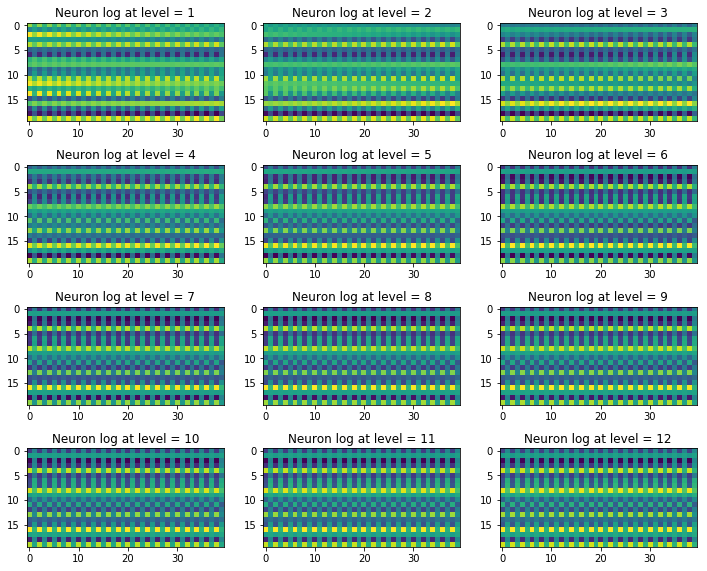




learning Rate is 0.005000





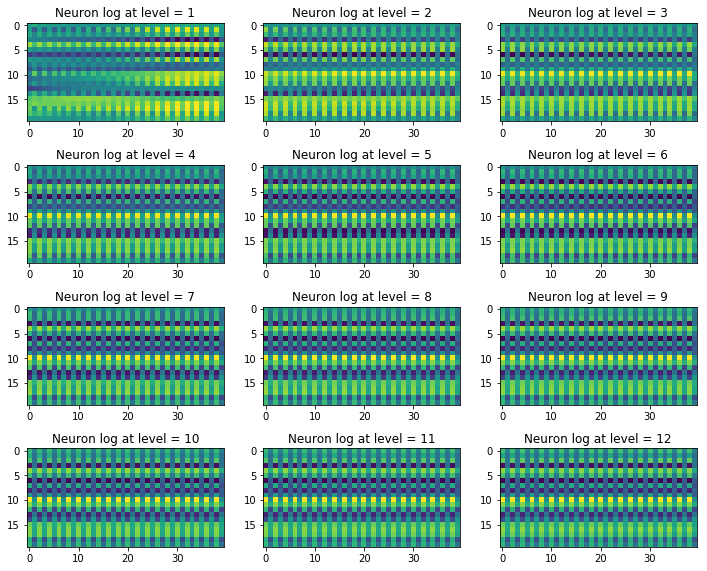




learning Rate is 0.010000





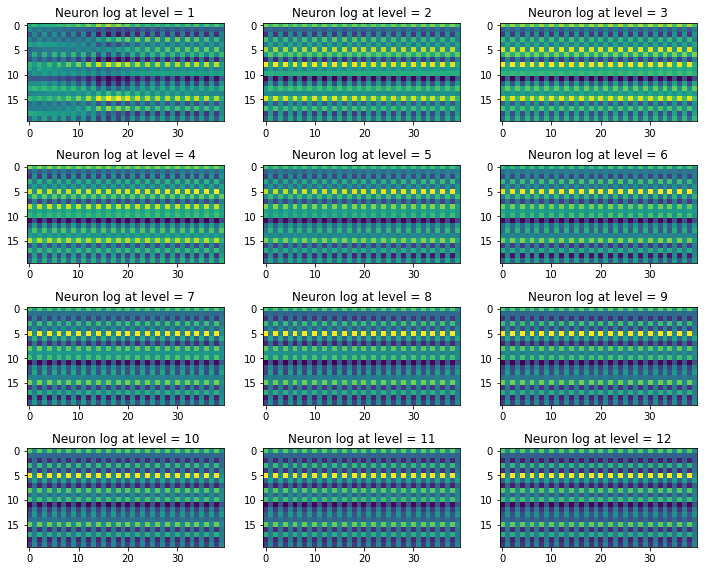




learning Rate is 0.020000





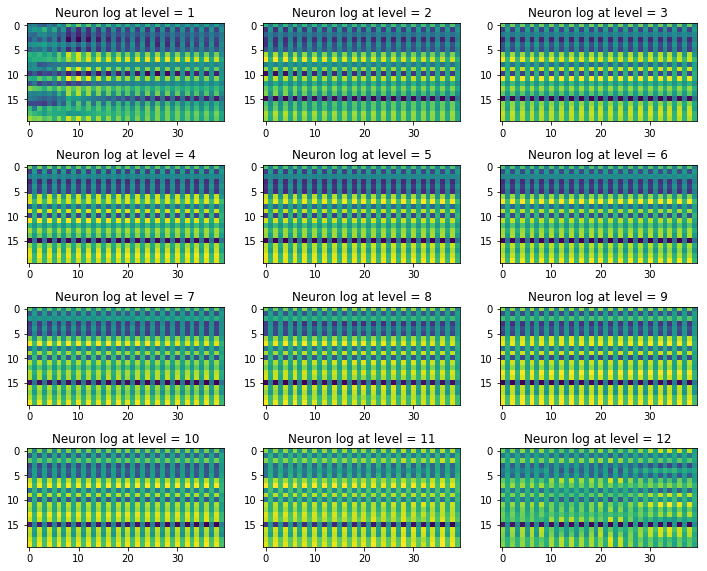




learning Rate is 0.040000





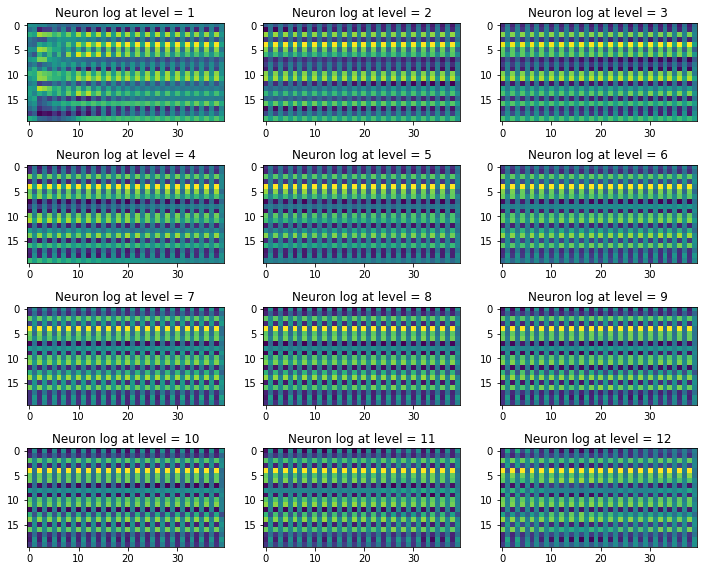




learning Rate is 0.080000





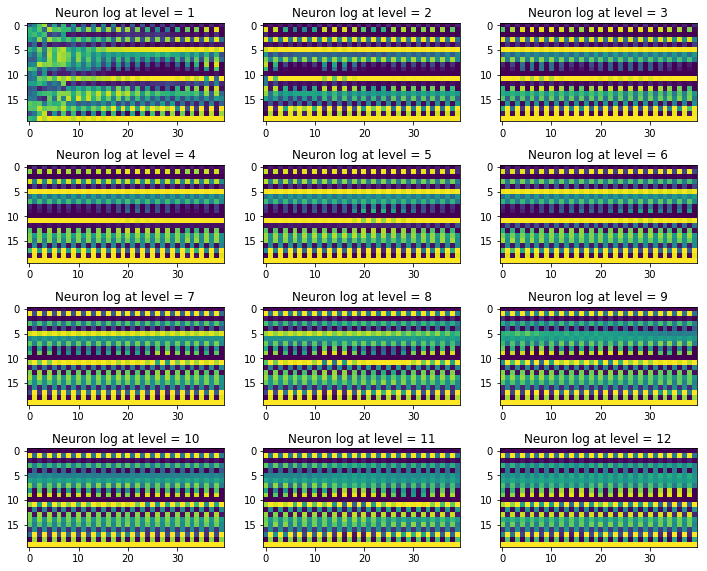




learning Rate is 0.160000





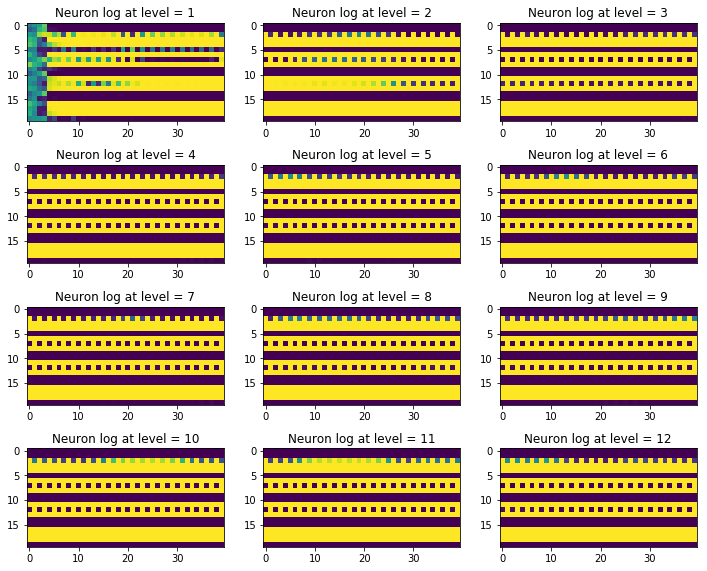




learning Rate is 0.320000





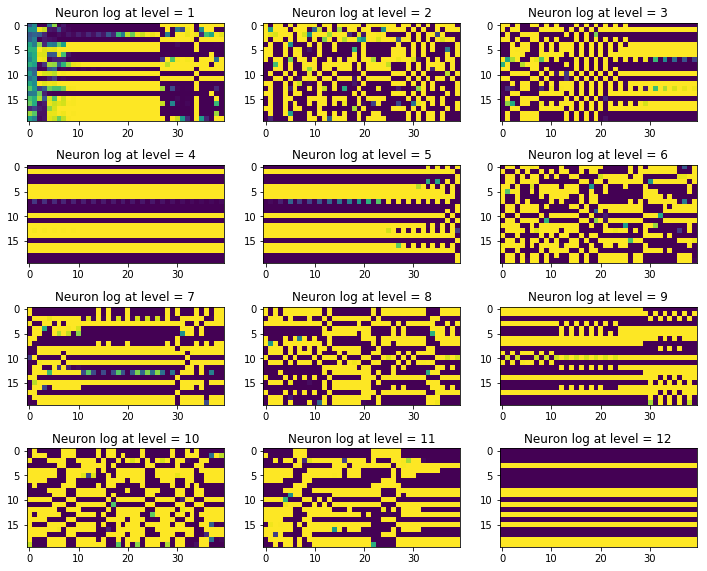




learning Rate is 0.500000





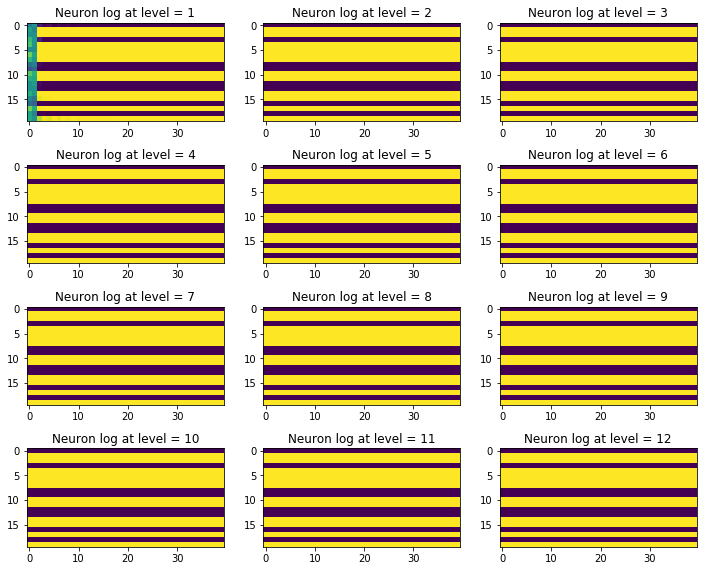




learning Rate is 1.000000





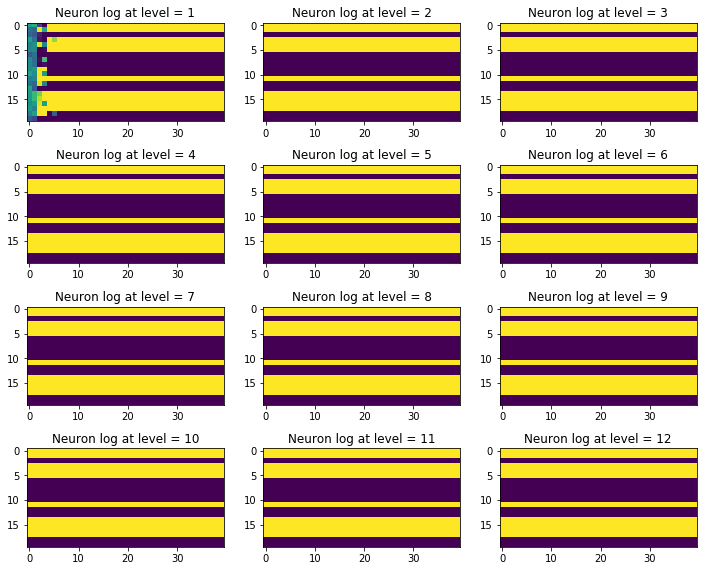




learning Rate is 1.500000





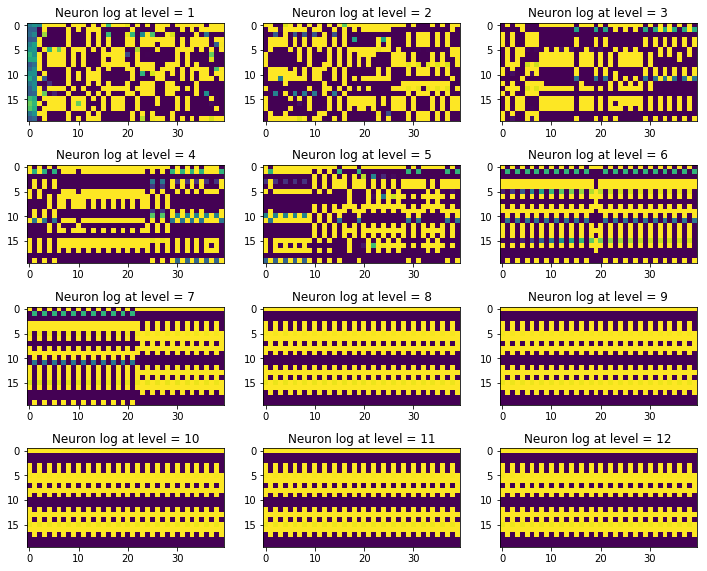




learning Rate is 2.000000





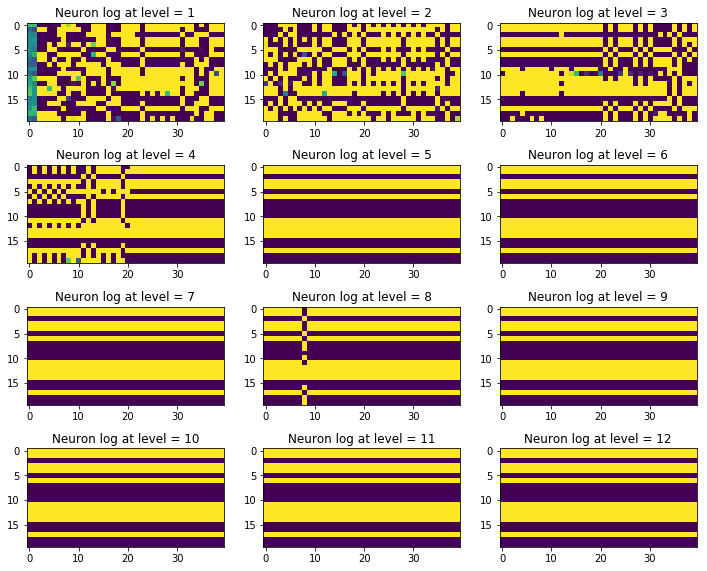

In [108]:
"""
    # Question number 4
    # 4.6
    Neurons activity log
"""

from matplotlib import pyplot as plt

# since I calculate different RNN in the part 5.2
# in this part i Used the data calculated in first part of 5.2
# also known as D1 learning Rate effect ...
# but in the first part of 5.2 we sweep among this learning rates ...
# learning_rate = [0.001, 0.005, 0.010, 0.020, 0.040, 0.080, 0.160, 0.32, 0.50 , 1.0, 1.5, 2]
# so i created a for via i in range of 1 til 12 and use D1[i]
# with the learning rate of learningRate[i]

learning_rate = [0.001, 0.005, 0.010, 0.020, 0.040, 0.080, 0.160, 0.32, 0.50 , 1.0, 1.5, 2]

for i in range(12):
    
    print("\n\n\nlearning Rate is %f\n\n\n"%(learning_rate[i]))
    drawN(D1,i)
    plt.gcf().set_size_inches(12, 10)
    plt.show()

def drawN(NNData,randomAccess):

    lossLog, NeuronLog = NNData[randomAccess].getlogData()
    learningRate = learning_rate[randomAccess]
    NeuronsActivities = []
# extracting Data in different times into different element of NeuronsActivities array ...
    for Log in NeuronLog:
        NeuronsActivities.append(Log)
    
    NeuronsActivities = np.concatenate(NeuronsActivities, 0)

    for i in range(12):    
        plt.subplot(4, 3, i+1)
        plt.imshow(np.transpose(np.concatenate(NeuronsActivities[i*20:(i+1)*20], 0)))
        plt.title("Neuron log at level = %d"%(i+1))
